## Space X Falcon 9 First Stage Landing Prediction

### Machine Learning Prediction

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.

## Objectives






Perform exploratory Data Analysis and determine Training Labels

* create a column for the class
* Standardize the data
* Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

* Find the method performs best using test data

#### * Supervised Learning
#### * UnSupervised Learning
#### * Reinforcement Learning

## Supervised Learning


#### Classification 
* Logistic Regression
* Decision Tree
* Random Forest
* K Nearest Neighbor (KNN)
* Support Vector Machine (SV)

#### Regression
* Linear Regression

## Import Libraries and Define Auxiliary Functions
We will import the following libraries for the lab

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

In [3]:
data= pd.read_csv(URL1)
data.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0


In [4]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

In [5]:
df = pd.read_csv(URL2)
df.head(2)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [6]:
import os

In [7]:
os.getcwd()

'C:\\Users\\nasim'

In [8]:
df1= pd.read_csv('dataset_part_2.csv')
data1= pd.read_csv('Week02_02.csv')

In [9]:
df1.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
data.info()

## TASK  1
Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [ ]:
#X=df.drop('Class', axis=1)
#Y=df['Class']

In [10]:
y=data['Class'].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

# TASK 2






Standardize the data in X then reassign it to the variable X using the transform provided below.

In [ ]:
#X'=X_mean/standard deviation

In [11]:
# students get this 
transform = preprocessing.StandardScaler()

In [12]:
x= transform.fit_transform(df)

In [ ]:
x

## TASK 3
Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.







X_train, X_test, Y_train, Y_test

In [13]:
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size=0.2, random_state=2)

In [14]:
Y_test.shape

(18,)

we can see we only have 18 test samples.

## TASK 4
Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.


### LogisticRegression

In [15]:
Lr= LogisticRegression()

In [16]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [17]:
#Allows us to test parameters of classification algorithms and find the best one
logreg_cv= GridSearchCV(Lr, parameters, cv=10)

In [18]:
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [19]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## Confusion Matrix

* Accuracy=  (TP+TN)/(TP+FP+FN+TN)
* Precision=  TP/(TP+FP)
* Recall=     TP/(TP+FN)

In [20]:
from sklearn.metrics import confusion_matrix

## TASK 5






Calculate the accuracy on the test data using the method score:

In [21]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

In [22]:
yhatlog=logreg_cv.predict(X_test)
confusion_matrix(Y_test,yhatlog)

array([[ 3,  3],
       [ 0, 12]], dtype=int64)

In [23]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

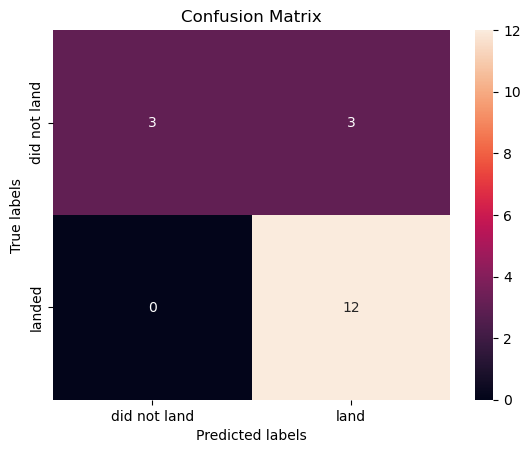

In [24]:
plot_confusion_matrix(Y_test,yhatlog)

## TASK 6
Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters.

### SVC

In [25]:
Xs_train, Xs_test, Ys_train, Ys_test= train_test_split(x, y, test_size=0.2, random_state=20)

In [26]:
svm = SVC()

In [27]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [28]:
svm_cv= GridSearchCV(svm, parameters, cv=10)

In [29]:
svm_cv.fit(Xs_train, Ys_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [30]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8285714285714286


## TASK 7






Calculate the accuracy on the test data using the method score:

In [31]:
svm_cv.score(Xs_test, Ys_test)

0.9444444444444444

In [32]:
yhatsvm=svm_cv.predict(Xs_test)
confusion_matrix(Ys_test,yhatsvm)

array([[ 4,  1],
       [ 0, 13]], dtype=int64)

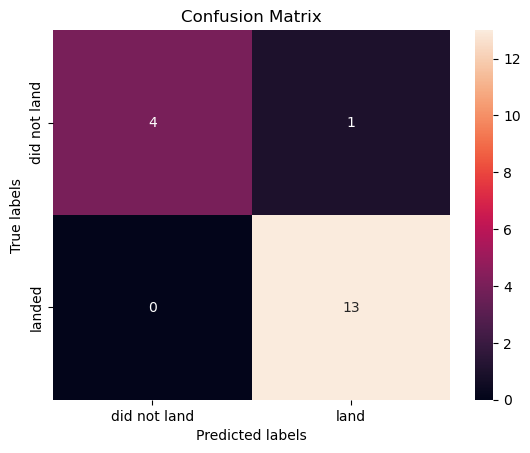

In [33]:
plot_confusion_matrix(Ys_test,yhatsvm)

## TASK 8
Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

### DecisionTree

In [34]:
Xt_train, Xt_test, Yt_train, Yt_test= train_test_split(x, y, test_size=0.2, random_state=112)

In [35]:
tree = DecisionTreeClassifier()

In [36]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [37]:
tree_cv= GridSearchCV(tree, parameters, cv=10)

In [38]:
tree_cv.fit(Xt_train, Yt_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [39]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.9035714285714287


## TASK 9






Calculate the accuracy of tree_cv on the test data using the method score:

In [40]:
tree_cv.score(Xt_test, Yt_test)

0.4444444444444444

In [41]:
yhattree = tree_cv.predict(Xt_test)
confusion_matrix(Yt_test,yhattree)

array([[3, 7],
       [3, 5]], dtype=int64)

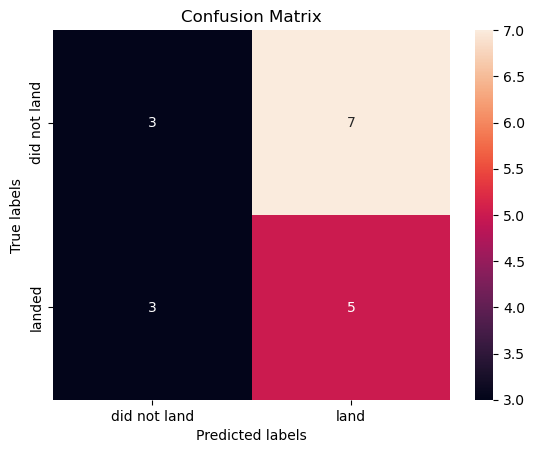

In [42]:
plot_confusion_matrix(Yt_test,yhattree)


## TASK 10
Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.


### KNN

In [43]:
Xk_train, Xk_test, Yk_train, Yk_test= train_test_split(x, y, test_size=0.2, random_state=2)

In [44]:
KNN = KNeighborsClassifier()

In [45]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [46]:
knn_cv= GridSearchCV(KNN, parameters, cv=10)

In [47]:
knn_cv.fit(Xk_train, Yk_train)

C:\Users\nasim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nasim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [48]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK 11






Calculate the accuracy of knn_cv on the test data using the method score:

In [49]:
knn_cv.score(Xk_test, Yk_test)

C:\Users\nasim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8333333333333334

In [50]:
yhatknn = knn_cv.predict(Xk_test)
confusion_matrix(Yk_test,yhatknn)

C:\Users\nasim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[ 3,  3],
       [ 0, 12]], dtype=int64)

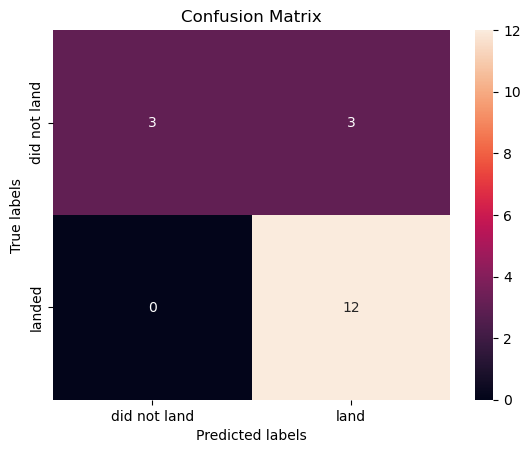

In [51]:
plot_confusion_matrix(Yk_test,yhatknn)


## TASK 12






Find the method performs best:

In [52]:
accu=[]
Method=[]

In [53]:
accu.append(logreg_cv.score(X_test, Y_test))
Method.append('logestic regression')
#-------------------------------------
accu.append(svm_cv.score(Xs_test, Ys_test))
Method.append('SVM')
#--------------------------------------
accu.append(tree_cv.score(Xt_test, Yt_test))
Method.append('Decission Tree')
#---------------------------------------
accu.append(knn_cv.score(Xk_test, Yk_test))
Method.append('KNN')

C:\Users\nasim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
print(accu)
print(Method)

[0.8333333333333334, 0.9444444444444444, 0.4444444444444444, 0.8333333333333334]
['logestic regression', 'SVM', 'Decission Tree', 'KNN']


In [55]:
import matplotlib.pyplot as plt

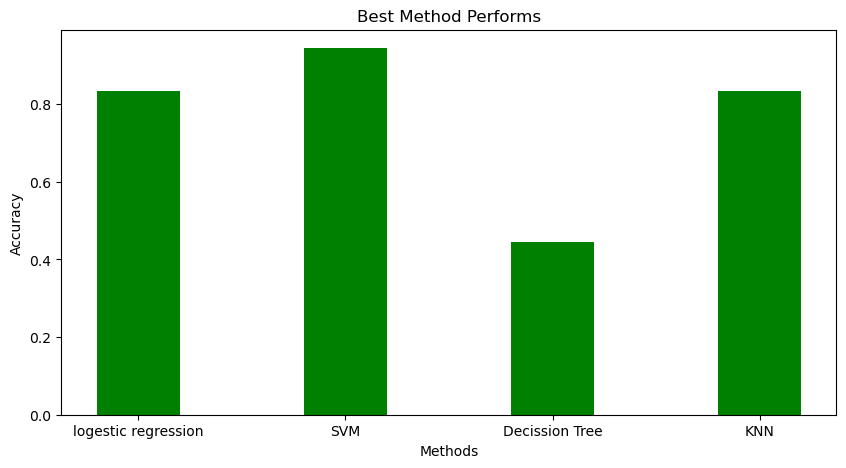

In [57]:
fig= plt.figure(figsize=(10,5))
plt.bar(Method, accu, width=0.4, color='g')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Best Method Performs')
plt.show()